In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats import diagnostic

In [2]:
adv = pd.read_csv('Advertising.csv',index_col=0)
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


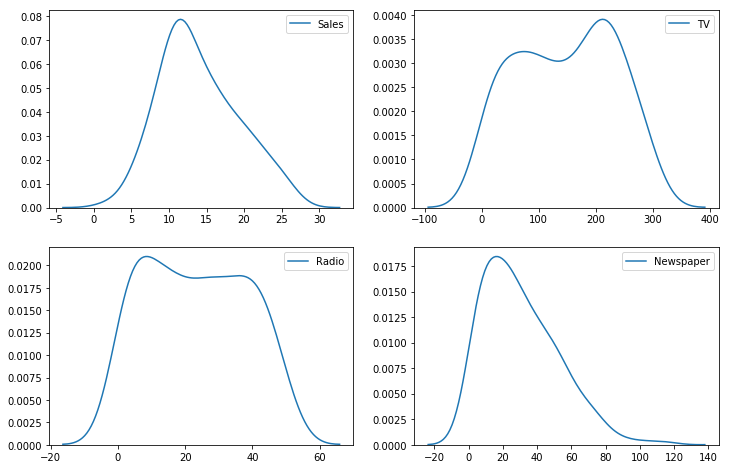

In [5]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(adv['Sales'],ax=ax[0,0])
sns.kdeplot(adv['TV'],ax=ax[0,1])
sns.kdeplot(adv['Radio'],ax=ax[1,0])
sns.kdeplot(adv['Newspaper'],ax=ax[1,1])
plt.show()

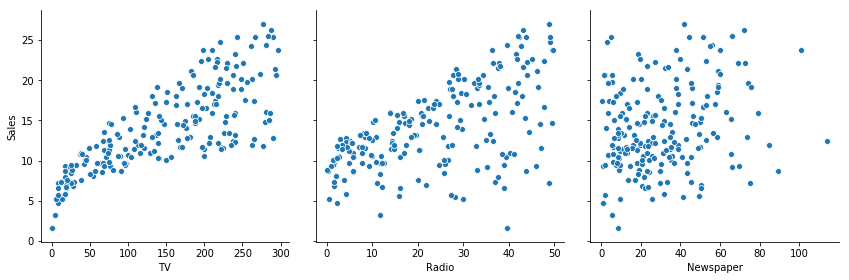

In [6]:
sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4)
plt.show()

- Sales is our dependent variable
- Initially all 3 variables will be our dependent variable

In [7]:
X1 = adv[['TV','Radio','Newspaper']]
y = adv['Sales']

Let us build a base model and check our assumptions for regression:

In [8]:
lm0 = LinearRegression()
lm0.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
y_pred = lm0.predict(X1)
print('MSE =',mean_squared_error(y,y_pred))
print('R^2 =',r2_score(y,y_pred))

MSE = 2.784126314510936
R^2 = 0.8972106381789522


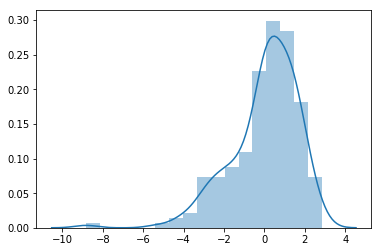

In [10]:
residuals = y.values - y_pred
sns.distplot(residuals)
plt.show()

In [11]:
shapiro(residuals)

(0.9176644086837769, 3.938041004403203e-09)

- pvalue < 0.05 implies that the residuals are not normally distributed

In [12]:
print('Mean of Residuals =',np.mean(residuals))

Mean of Residuals = -1.1013412404281553e-15


- Mean of residuals is approximately 0

In [13]:
sms.het_goldfeldquandt(residuals, X1)

(1.3444110321318345, 0.07338571632410308, 'increasing')

- pvalue > 0.05 implies that the residuals are homoscedastic

In [14]:
min(diagnostic.acorr_ljungbox(residuals, lags=199)[1])

0.46834731915728334

- pvalue > 0.05 implies that residuals are not autocorrelated

In [15]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.3, random_state=0)
print(X1_train.shape)
print(X1_test.shape)

(140, 3)
(60, 3)


In [16]:
X1_train_sm = X1_train
X1_train_sm = sm.add_constant(X1_train_sm)
model1 = sm.OLS(y_train,X1_train_sm).fit()
model1.params

C:\Users\mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.880255
TV           0.043915
Radio        0.200280
Newspaper    0.001844
dtype: float64

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           8.76e-70
Time:                        15:41:09   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.000       2.168       3.593
TV             0.0439      0.002     27.027      0.000       0.041       0.047
Radio          0.2003      0.009     21.577      0.000       0.182       0.219
Newspaper      0.0018      0.007      0.268      0.789      -0.012       0.015
==============================================================================
Omnibus:                       10.989   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.961
Skew:                          -0.716   Prob(JB):                      0.00253
Kurtosis:                       2.961   Cond. No.                         476.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- the pvalue for coefficients of Intercept, TV and Radio is 0.0 which is < 0.05 which implies that they are significant values
- But, pvalue for Newspaper is > 0.05 which implies that it is insignificant.
- Hence, let's do regression without this variable

In [18]:
X2 = adv[['TV','Radio']]
y = adv['Sales']
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.3, random_state=0)
X2_train_sm = sm.add_constant(X2_train)
model2 = sm.OLS(y_train,X2_train_sm).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           3.11e-71
Time:                        15:41:09   Log-Likelihood:                -262.45
No. Observations:                 140   AIC:                             530.9
Df Residuals:                     137   BIC:                             539.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9099      0.342      8.516      0.000       2.234       3.586
TV             0.0440      0.002     27.341      0.000       0.041       0.047
Radio          0.2010      0.009     22.690      0.000       0.183       0.219
==============================================================================
Omnibus:                       11.060   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.061
Skew:                          -0.719   Prob(JB):                      0.00240
Kurtosis:                       2.956   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now all pvalues for coefficients ans intercepts are < 0.05. Hence, they are all significant
- Also, R-squared (0.907) and Adjusted R-squared (0.905) values did not change at all from our first model to the second. This shows that removing Newspaper from our model did not impact our accuracy.
- Furthermore, our AIC and BIC values did decrease from our forst to second model which implies that less information is lost in our second model which means it is better than the first.

In [19]:
lm2 = LinearRegression()
lm2.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(lm2.intercept_)
print(lm2.coef_)

2.909895690512924
[0.04396652 0.20099526]


In [21]:
y_pred = lm2.predict(X2_test)
print('MSE =',mean_squared_error(y_test,y_pred))
print('R^2 =',r2_score(y_test,y_pred))

MSE = 3.670809675491495
R^2 = 0.8656552691810044
